In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import Ridge
import math
from sklearn.utils import resample
import matplotlib.pyplot as plt

In [2]:
#Function made in part2
#Takes in number of iterations, resampling size, full data set, and sample
#Reports the confidence interval of the prediction
def bootstrap_confidence_i(n_iterations,n_size,data,sample):
    mse_values = [] #Initialize list to hold mse values from all iterations
    for i in range(n_iterations):
        Ridge_model = Ridge(alpha=1.5,normalize=True,max_iter=100) #define model
        train = resample(data, n_samples=n_size)  #Resample to get training data
        X_train = train[:,:-1] 
        Y_train = train[:,-1]
        Ridge_model.fit(X_train,Y_train)
        test_prediction = Ridge_model.predict(sample) #Predict for sample
        mse_values.append(test_prediction) #Append to list
    #Plot figure
    plt.figure()
    plt.hist(mse_values)
    plt.show()
    #Confidence interval
    alpha = 0.95
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(mse_values, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(mse_values, p))
    print('%.1f confidence interval %.4f and %.4f' % (alpha*100, lower, upper))
    return 

# Objective

## Find CI of  Growth rate where genes are expressed at mean value

In [3]:
df = pd.read_csv('ecs171.dataset.txt', sep='\s')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [4]:
#Get featurse and labels
X = df.iloc[:,6:].values
m = X.shape[0]
n = X.shape[1]
Y = np.reshape(df.iloc[:,5].values,[m,1])


In [5]:
#Get mean
mean_gene = np.reshape(np.mean(X, axis =0),[1,4495]) #Get Mean Gene values

In [6]:
# report confidence interval
n_iterations = 100
sampling_size = math.floor(X.shape[0]*0.9)
data = np.concatenate((X,Y), axis = 1)

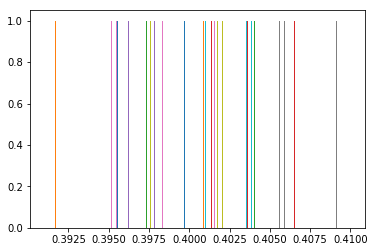

95.0 confidence interval 0.3929 and 0.4087


In [7]:
bootstrap_confidence_i(n_iterations,sampling_size,data,mean_gene)